# Project - Analyzing Sales Data

**Author**: Phatchara Soroschokchai (Folk)

**Course**: `Pandas Foundation`

In [2]:
# import data
import pandas as pd
import numpy as np
import datetime
df = pd.read_csv("data/sample-store.csv")

In [3]:
# preview top 5 rows
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2017-110422,1/21/2017,1/23/2017,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2020-121258,2/26/2020,3/3/2020,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2020-119914,5/4/2020,5/9/2020,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683.0,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [4]:
# shape of dataframe
df.shape

(9994, 21)

We can use `pd.to_datetime()` function to convert columns 'Order Date' and 'Ship Date' to datetime.

In [5]:
# Convert order date and ship date to datetime in the original dataframe
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')

In [6]:
# See data frame information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   datetime64[ns]
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country/Region  9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9983 non-null   float64       
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [7]:
# Count NAN in postal code column
df['Postal Code'].isna().sum()

11

In [8]:
# Filter rows with missing values
df[df['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2020-104066,2020-12-05,2020-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,2018-11-07,2018-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,2019-04-06,2019-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588


# Data Analysis Problem!!

## 01 - How many columns, rows in this dataset

In [9]:
rows = df.shape[0]
columns = df.shape[1]

print(f"Number of rows is {rows} records, and Number of columns is {columns} columns.")

Number of rows is 9994 records, and Number of columns is 21 columns.


## 02 - is there any missing values?, if there is, which colunm? how many nan values?

In [10]:
missing_values = df.isna().sum().sort_values(ascending=False)
missing_values.head()

Postal Code    11
Row ID          0
Discount        0
Quantity        0
Sales           0
dtype: int64

## 03 - your friend ask for `California` data, filter it and export csv for him

In [11]:
df_california = df.query("State == 'California'")
df_california.to_csv("data/california_stores_data.csv", index=False)

## 04 - your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file

In [24]:
df_filter01 = df[((df['State'] == 'California') | (df['State'] == 'Texas')) & (df['Order Date'].dt.year == 2017)]
df_filter01.reset_index(drop=True, inplace=True)
df_filter01.to_csv('data/California_Texas_2017_stores.csv', index=False)
df_filter01.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,is_late
627,9886,CA-2017-112291,2017-04-03,2017-04-08,Standard Class,KE-16420,Katrina Edelman,Corporate,United States,Los Angeles,...,West,TEC-AC-10000736,Technology,Accessories,Logitech G600 MMO Gaming Mouse,159.980,2,0.0,57.5928,True
628,9904,CA-2017-122609,2017-11-12,2017-11-18,Standard Class,DP-13000,Darren Powers,Consumer,United States,Carrollton,...,Central,FUR-FU-10004587,Furniture,Furnishings,"GE General Use Halogen Bulbs, 100 Watts, 1 Bul...",25.128,3,0.6,-6.9102,True
629,9905,CA-2017-122609,2017-11-12,2017-11-18,Standard Class,DP-13000,Darren Powers,Consumer,United States,Carrollton,...,Central,TEC-AC-10002567,Technology,Accessories,Logitech G602 Wireless Gaming Mouse,127.984,2,0.2,25.5968,True
630,9943,CA-2017-143371,2017-12-28,2018-01-03,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,Anaheim,...,West,OFF-ST-10001128,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",998.820,9,0.0,29.9646,True
631,9944,CA-2017-143371,2017-12-28,2018-01-03,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,Anaheim,...,West,OFF-SU-10002537,Office Supplies,Supplies,Acme Box Cutter Scissors,51.150,5,0.0,13.2990,True


## 05 - how much total sales, average sales, and standard deviation of sales your company make in 2017

In [13]:
sales_sum_2017 = df.loc[df['Order Date'].dt.year == 2017, 'Sales'].sum()
sales_avg_2017 = df.loc[df['Order Date'].dt.year == 2017, 'Sales'].mean()
sales_std_2017 = df.loc[df['Order Date'].dt.year == 2017, 'Sales'].std()

print(f'Total sales is ${round(sales_sum_2017, 2)}')
print(f'Average sales is ${round(sales_avg_2017, 2)}')
print(f'Standard Deviation of sales is ${round(sales_std_2017, 2)}')

Total sales is $484247.5
Average sales is $242.97
Standard Deviation of sales is $754.05


## 06 - which Segment has the highest profit in 2018

In [14]:
seg_highest_profit_2018 = df[df['Order Date'].dt.year == 2018] \
                          .groupby('Segment')['Profit'] \
                          .agg(['sum']).sort_values('sum', ascending=False) \
                          .reset_index()

seg_highest_profit_2018.columns = ['Segment', 'Total Profit']

seg_highest_profit_2018.head(1)

,Segment,Total Profit
0,Consumer,28460.1665


## 07 - which top 5 States have the least total sales between 15 April 2019 - 31 December 2019

In [15]:
df_15apr_31dec_2019 = df[(df['Order Date'] >= '2019-04-15') & (df['Order Date'] <= '2019-12-31')]
df_15apr_31dec_2019.groupby('State')['Sales'].agg(['sum']) \
    .sort_values('sum', ascending=True) \
    .round(2).reset_index().head(5)

,State,sum
0,New Hampshire,49.05
1,New Mexico,64.08
2,District of Columbia,117.07
3,Louisiana,249.80
4,South Carolina,502.48


## 08 - what is the proportion of total sales (%) in West + Central in 2019 e.g. 25%

In [16]:

proportion_sales_region = df[(df['Order Date'].dt.year >= 2019) & ((df['Region'] == 'West') | (df['Region'] == 'Central'))] \
    .groupby('Region')['Sales'].agg(['sum']).round().sort_values('sum', ascending=False).reset_index()

proportion_sales_region['%'] = (100 * proportion_sales_region['sum'] / proportion_sales_region['sum'].sum()).round(2)

proportion_sales_region

,Region,sum,%
0,West,437609.0,59.77
1,Central,294528.0,40.23


## 09 - Find top 10 popular products in terms of number of orders vs. total sales during 2019-2020

In [17]:
df[df['Order Date'].dt.year >= 2019] \
        .groupby('Product Name')['Order Date'].agg(['count']) \
        .sort_values('count', ascending=False) \
        .reset_index().head(10)

,Product Name,count
0,Easy-staple paper,27
1,Staples,24
2,Staple envelope,22
3,Staples in misc. colors,13
4,Staple remover,12
5,Storex Dura Pro Binders,12
6,Chromcraft Round Conference Tables,12
7,"Global Wood Trimmed Manager's Task Chair, Khaki",11
8,Avery Non-Stick Binders,11
9,Staple-based wall hangings,10


In [18]:
df[df['Order Date'].dt.year >= 2019] \
        .groupby('Product Name')['Sales'].agg(['sum']).round() \
        .sort_values('sum', ascending=False) \
        .reset_index().head(10)

,Product Name,sum
0,Canon imageCLASS 2200 Advanced Copier,61600.0
1,Hewlett Packard LaserJet 3310 Copier,16080.0
2,"3D Systems Cube Printer, 2nd Generation, Magenta",14300.0
3,GBC Ibimaster 500 Manual ProClick Binding System,13622.0
4,GBC DocuBind TL300 Electric Binding System,12737.0
5,GBC DocuBind P400 Electric Binding System,12521.0
6,Samsung Galaxy Mega 6.3,12264.0
7,HON 5400 Series Task Chairs for Big and Tall,11847.0
8,Martin Yale Chadless Opener Electric Letter Op...,11826.0
9,Global Troy Executive Leather Low-Back Tilter,10170.0


## 10 - plot 3 plots

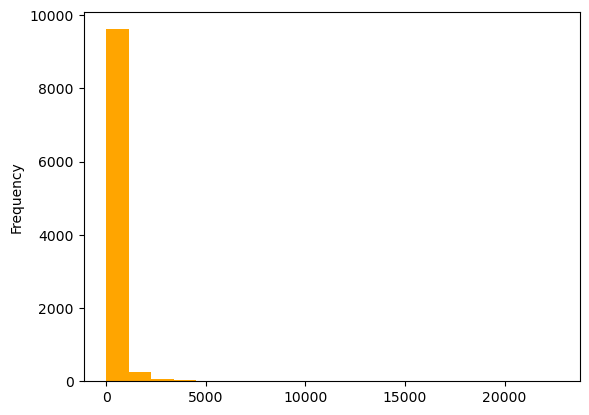

In [19]:
df['Sales'].plot(kind='hist', bins=20, color="orange");

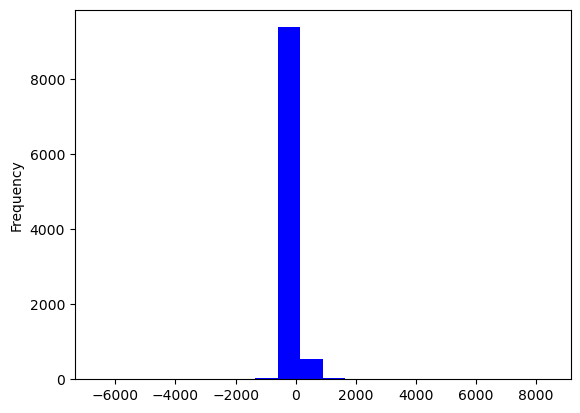

In [20]:
df['Profit'].plot(kind='hist', bins=20, color="blue");

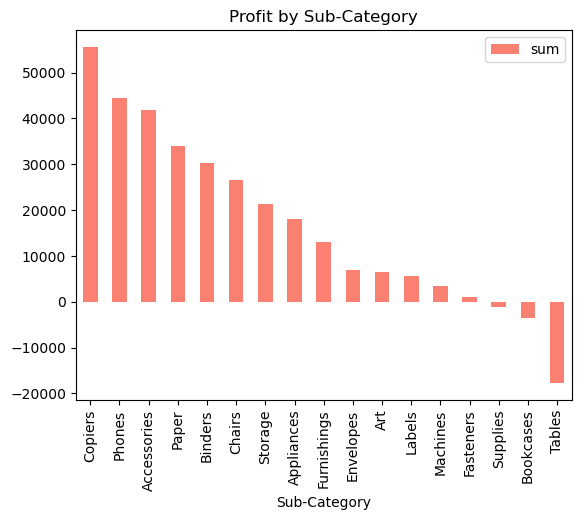

In [21]:
df.groupby('Sub-Category')['Profit'].agg(['sum']).sort_values('sum', ascending=False) \
		.plot(kind="bar", color="salmon", title="Profit by Sub-Category");

## 11 - use np.where() to create new column in dataframe to help you answer your own questions

In [22]:
# TODO Bonus - use np.where() to create new column in dataframe to help you answer your own questions
df['is_late'] = np.where((df['Ship Date'] - df['Order Date']).dt.days > 3, True, False)
df[['Order Date', 'Ship Date', 'is_late']]

,Order Date,Ship Date,is_late
0,2019-11-08,2019-11-11,False
1,2019-11-08,2019-11-11,False
2,2019-06-12,2019-06-16,True
3,2018-10-11,2018-10-18,True
4,2018-10-11,2018-10-18,True
...,...,...,...
9989,2017-01-21,2017-01-23,False
9990,2020-02-26,2020-03-03,True
9991,2020-02-26,2020-03-03,True
9992,2020-02-26,2020-03-03,True


In [23]:
df['is_late'].value_counts().reset_index()

,is_late,count
0,True,6766
1,False,3228
